<a href="https://colab.research.google.com/github/plaban1981/Pytorch_DL/blob/main/Image_Classification_with_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic Deep Learning Development Process
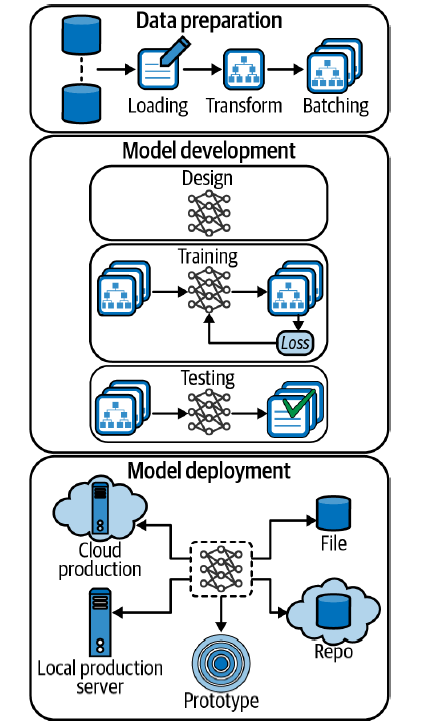

## Data Loading

In [1]:
from torchvision.datasets import CIFAR10
train_data = CIFAR10(root="./train/",train=True,download=True)
print(train_data)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./train/cifar-10-python.tar.gz to ./train/
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train


In [2]:
print(len(train_data))

50000


In [4]:
print(train_data.data.shape)

(50000, 32, 32, 3)


In [7]:
print(train_data.targets)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [8]:
print(train_data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
print(train_data.class_to_idx)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [10]:
print(type(train_data[0]))

<class 'tuple'>


In [11]:
train_data[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F816C8EB050>, 6)

In [12]:
data,label = train_data[0]

In [13]:
print(data)

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F816C855210>


In [14]:
print(type(data))

<class 'PIL.Image.Image'>


* The data consists of a PIL image object. 
* PIL is a common
image format that uses the Pillow library to store image pixel
values in the format of height × width × channels.

## Sample Image

Text(0.5, 1.0, 'frog')

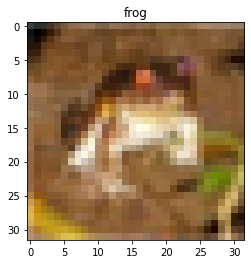

In [16]:
import matplotlib.pyplot as plt
plt.imshow(data)
plt.title(train_data.classes[label])

## load the test data

In [17]:
test_data = CIFAR10(root="./test/",train=False,download=True)
print(test_data)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./test/cifar-10-python.tar.gz to ./test/
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test


In [18]:
print(len(test_data))

10000


## Data Transforms
* The data might need to be adjusted
before it is passed into the NN model for training and testing
* These adjustments are accomplished by applying transforms.
* Using transforms in PyTorch we can
define a sequence of transforms and apply it when the data is
accessed.

In [19]:
from torchvision import transforms
train_transforms = transforms.Compose([
                transforms.RandomCrop(32, padding=4),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean=(0.4914, 0.4822, 0.4465),
                                     std=(0.2023, 0.1994, 0.2010))
                ])

In [20]:
train_data = CIFAR10(root="./train/",train=True,download=True,transform=train_transforms)

Files already downloaded and verified


In [21]:
print(train_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [22]:
print(train_data.transforms)

StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [23]:
data, label = train_data[0]

In [25]:
print(data.size())

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'frog')

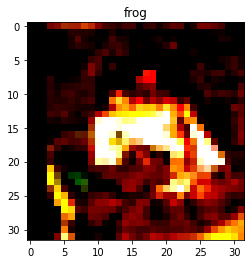

In [26]:
import matplotlib.pyplot as plt
# Set the color channel as the third dimension
image = data.numpy().transpose((1, 2, 0))
plt.imshow(image)
plt.title(train_data.classes[label])

## Image Classification with Transfer Learning

* Transfer learning, a process in which
we fine-tune pretrained models with a much smaller dataset of
new images

To train our new classifier, we will fine-tune another famous
model, called **ResNet18**, by loading the pretrained model and
training it with 120 new training images of bees and ants—a
much smaller set compared to the millions of images in
ImageNet.

## Data Processing

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models
from torchvision import transforms

## Download the data that we’ll use for training and validation:

In [28]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://pytorch.tips/bee-zip'
with urlopen(zipurl) as zipresp:
  with ZipFile(BytesIO(zipresp.read())) as zfile:
    zfile.extractall('./data')

## Data

* Data is loaded as images in your local data/ folder. 

* They are located in
data/hymenoptera_data/train and data/hymenoptera_data/val,
respectively.

## Define our transforms, load the data, and configure batch samplers.

In [29]:
train_transforms = transforms.Compose([
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456,0.406],
                                                           std=[0.229, 0.224, 0.225])
                                      ])
val_transforms = transforms.Compose([
                                    transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                        std=[0.229, 0.224, 0.225])
                                    ])

## Define Dataset

In [30]:
train_dataset = datasets.ImageFolder(root='data/hymenoptera_data/train',transform=train_transforms)
val_dataset = datasets.ImageFolder(root='data/hymenoptera_data/val',transform=val_transforms)

## Define dataloaders for batch iteration:

* num_workers --> configure that many CPU processes to handle the parallel processing

In [31]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=4,
                                           shuffle=True,
                                           num_workers=0)
val_loader = torch.utils.data.DataLoader(val_dataset,
                                         batch_size=4,
                                         shuffle=True,
                                        num_workers=0)

## Model Design

In [32]:
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [33]:
print(model.fc)

Linear(in_features=512, out_features=1000, bias=True)


In [34]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
print(model.fc)

Linear(in_features=512, out_features=2, bias=True)


## Training and Validation